<a href="https://colab.research.google.com/github/23028939/project-2025-priyanka/blob/main/data_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DATA PREPROCESSING

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
#connecting collab to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading data
df = pd.read_csv('/content/drive/MyDrive/PCOS_data.csv')
print(df.head())


   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.3           15                78                22  ...   
1  24.9           15                74                20  ...   
2  25.3           11                72                18  ...   
3  29.7           13                72                20  ...   
4  20.1           11                72                18  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                  0                  110  

In [ ]:
df.shape                 #prints the shape of dataframe

(541, 45)

In [ ]:
df.columns             #prints the columns of

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [ ]:
#removing unnecessary columns
df.drop(columns=['Sl. No', 'Patient File No.', 'Blood Group', 'Unnamed: 44'],  inplace=True, errors='ignore')
#print(df.columns)

df.columns = df.columns.str.strip()           #removes leading and trailing whitespaces from column names
df.columns = df.columns.str.replace(' ', '_') #replaces spaces in column names with underscores
df.columns = df.columns.str.upper()           #converts column names to uppercase
df.columns = df.columns.str.replace('-', '_') #replaces hyphens in column names with underscores
df.columns = df.columns.str.replace('.', '', regex=False) #replaces periods in column names with nothing

print(df.columns)


Index(['PCOS_(Y/N)', 'AGE_(YRS)', 'WEIGHT_(KG)', 'HEIGHT(CM)', 'BMI',
       'PULSE_RATE(BPM)', 'RR_(BREATHS/MIN)', 'HB(G/DL)', 'CYCLE(R/I)',
       'CYCLE_LENGTH(DAYS)', 'MARRAIGE_STATUS_(YRS)', 'PREGNANT(Y/N)',
       'NO_OF_ABORTIONS', 'I___BETA_HCG(MIU/ML)', 'II____BETA_HCG(MIU/ML)',
       'FSH(MIU/ML)', 'LH(MIU/ML)', 'FSH/LH', 'HIP(INCH)', 'WAIST(INCH)',
       'WAIST:HIP_RATIO', 'TSH_(MIU/L)', 'AMH(NG/ML)', 'PRL(NG/ML)',
       'VIT_D3_(NG/ML)', 'PRG(NG/ML)', 'RBS(MG/DL)', 'WEIGHT_GAIN(Y/N)',
       'HAIR_GROWTH(Y/N)', 'SKIN_DARKENING_(Y/N)', 'HAIR_LOSS(Y/N)',
       'PIMPLES(Y/N)', 'FAST_FOOD_(Y/N)', 'REGEXERCISE(Y/N)',
       'BP__SYSTOLIC_(MMHG)', 'BP__DIASTOLIC_(MMHG)', 'FOLLICLE_NO_(L)',
       'FOLLICLE_NO_(R)', 'AVG_F_SIZE_(L)_(MM)', 'AVG_F_SIZE_(R)_(MM)',
       'ENDOMETRIUM_(MM)'],
      dtype='object')


In [ ]:
df.dtypes

,0
PCOS_(Y/N),int64
AGE_(YRS),int64
WEIGHT_(KG),float64
HEIGHT(CM),float64
BMI,float64
PULSE_RATE(BPM),int64
RR_(BREATHS/MIN),int64
HB(G/DL),float64
CYCLE(R/I),int64
CYCLE_LENGTH(DAYS),int64


In [ ]:
#converting object columns to numeric
df['II____BETA_HCG(MIU/ML)'] = pd.to_numeric(df['II____BETA_HCG(MIU/ML)'], errors='coerce')
df['AMH(NG/ML)'] = pd.to_numeric(df['AMH(NG/ML)'], errors='coerce')
df.dtypes

,0
PCOS_(Y/N),int64
AGE_(YRS),int64
WEIGHT_(KG),float64
HEIGHT(CM),float64
BMI,float64
PULSE_RATE(BPM),int64
RR_(BREATHS/MIN),int64
HB(G/DL),float64
CYCLE(R/I),int64
CYCLE_LENGTH(DAYS),int64


In [ ]:
df.isnull().sum()    #prints missing values

,0
PCOS_(Y/N),0
AGE_(YRS),0
WEIGHT_(KG),0
HEIGHT(CM),0
BMI,0
PULSE_RATE(BPM),0
RR_(BREATHS/MIN),0
HB(G/DL),0
CYCLE(R/I),0
CYCLE_LENGTH(DAYS),0


In [ ]:
#filling missing values using median interpretation
df['MARRAIGE_STATUS_(YRS)'].fillna(df['MARRAIGE_STATUS_(YRS)'].median(), inplace=True)
df['FAST_FOOD_(Y/N)'].fillna(df['FAST_FOOD_(Y/N)'].median(), inplace=True)
df['II____BETA_HCG(MIU/ML)'].fillna(df['II____BETA_HCG(MIU/ML)'].median(), inplace=True)
df['AMH(NG/ML)'].fillna(df['AMH(NG/ML)'].median(), inplace=True)

<ipython-input-46-f518fe44d152>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MARRAIGE_STATUS_(YRS)'].fillna(df['MARRAIGE_STATUS_(YRS)'].median(), inplace=True)
<ipython-input-46-f518fe44d152>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [ ]:
#EXPLORATORY DATA ANALYSIS

In [ ]:
print(df.describe())        #prints summary statistics

       PCOS_(Y/N)   AGE_(YRS)  WEIGHT_(KG)  HEIGHT(CM)         BMI  \
count  541.000000  541.000000   541.000000  541.000000  541.000000   
mean     0.327172   31.430684    59.637153  156.484835   24.307579   
std      0.469615    5.411006    11.028287    6.033545    4.055129   
min      0.000000   20.000000    31.000000  137.000000   12.400000   
25%      0.000000   28.000000    52.000000  152.000000   21.600000   
50%      0.000000   31.000000    59.000000  156.000000   24.200000   
75%      1.000000   35.000000    65.000000  160.000000   26.600000   
max      1.000000   48.000000   108.000000  180.000000   38.900000   

       PULSE_RATE(BPM)  RR_(BREATHS/MIN)    HB(G/DL)  CYCLE(R/I)  \
count       541.000000        541.000000  541.000000  541.000000   
mean         73.247689         19.243993   11.160037    2.560074   
std           4.430285          1.688629    0.866904    0.901950   
min          13.000000         16.000000    8.500000    2.000000   
25%          72.000000       

ValueError: num must be an integer with 1 <= num <= 9, not 10

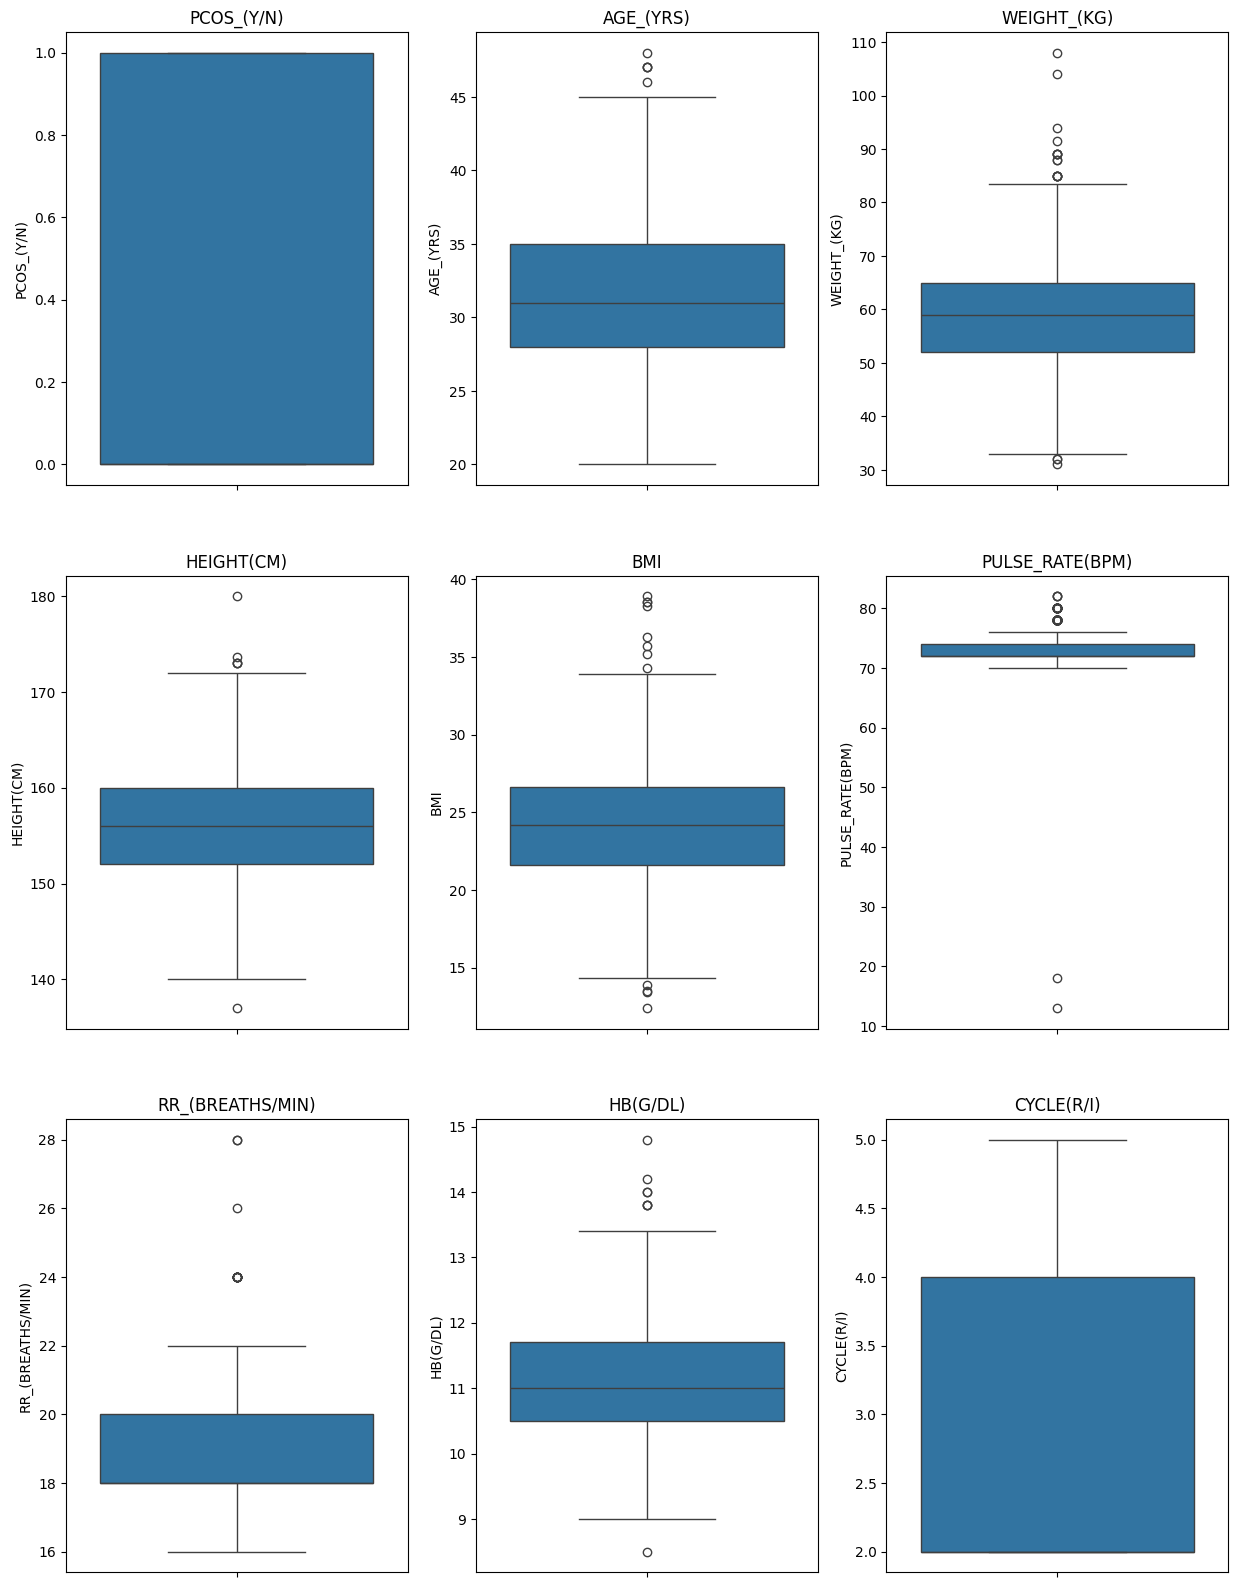

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,20))
for i, col in enumerate(df.columns[:19], 1):
  plt.subplot(3,3,i)
  sns.boxplot(df[col])
  plt.title(col)
plt.tight_layout()
plt.show()